In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import scipy
from scipy.optimize import curve_fit
from uravu.distribution import Distribution
from uravu import plotting
from uravu.relationship import Relationship
from uravu.utils import bayes_factor
import time

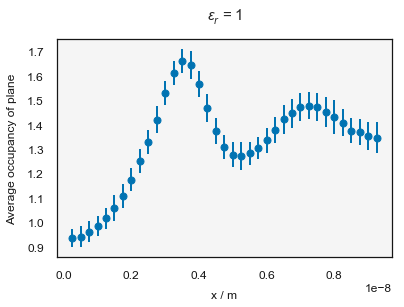

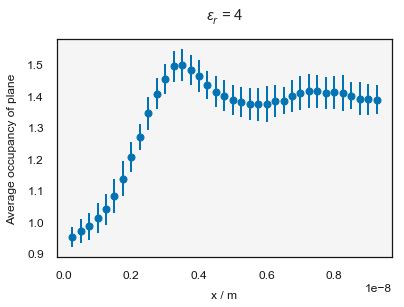

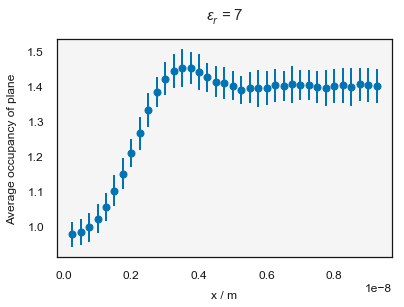

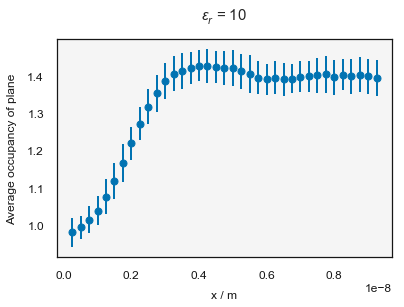

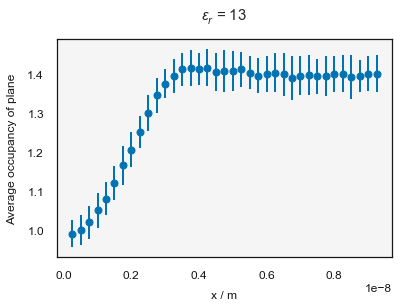

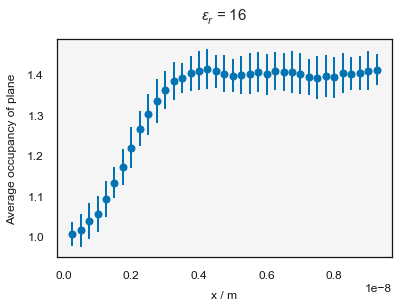

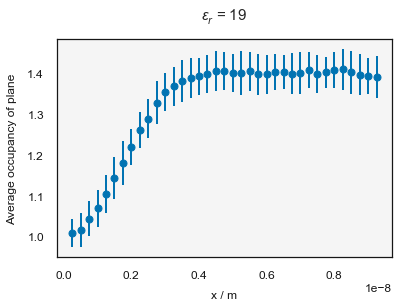

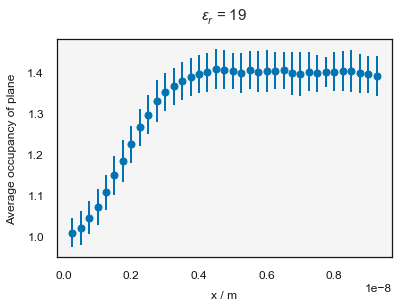

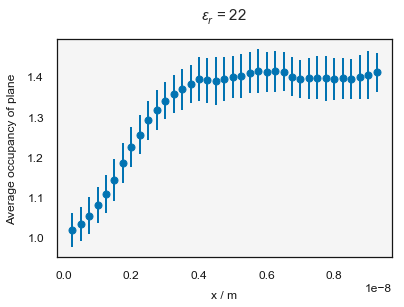

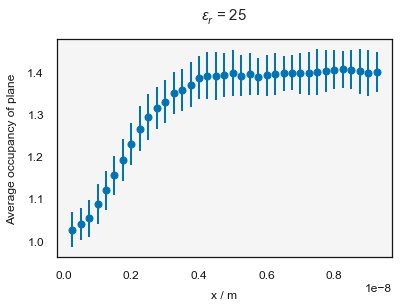

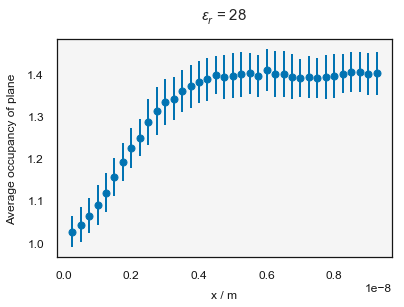

In [3]:
all_105_distributions = np.zeros((37,13))

all_105_errors = np.zeros((37,13))

all_105_errors_sd = np.zeros((37,13))

for h, g in enumerate([1,4,7,10,13,16,19]):
    distri = np.zeros((37,60))

    for j in range(10):
        path = "./27_11_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)
        
        path = "./27_11_20/charges_105/perm_{}/calc_{}/average_occupancy_second.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data_2 = data['average_occupancy']

        distribution_data_2 = np.roll(distribution_data_2,1)

        distri[:,2 * j] = 0.5*(distribution_data[38:] + distribution_data_2[38:])
        distri[:,2 * j + 1] = 0.5*(np.flip(distribution_data[:37]) + np.flip(distribution_data_2[:37]))       
        
        path = "./07_12_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

    
        path = "./07_12_20/charges_105/perm_{}/calc_{}/average_occupancy_first.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data_2 = data['average_occupancy']

        distribution_data_2 = np.roll(distribution_data_2,1)

        distri[:,20 + 2 * j] = 0.5*(distribution_data[38:] + distribution_data_2[38:])
        distri[:,20 + 2 * j + 1] = 0.5*(np.flip(distribution_data[:37]) + np.flip(distribution_data_2[:37]))
        

    for j in range(5):

        path = "./24_12_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])
        

        path = "./25_12_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        

    distributions = np.mean(distri, axis = 1 )
    
    all_105_distributions[:,h] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  / np.sqrt(60)
        
    all_105_errors[:,h] = err
    all_105_errors_sd[:,h] = err * np.sqrt(60)


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err*np.sqrt(60), fmt="o")
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    plt.show()
    
for h, g in enumerate([19,22,25,28]):
    distri = np.zeros((37,100))

    for j in range(10):
        path = "./27_11_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)
        
        path = "./27_11_20/charges_105/perm_{}/calc_{}/average_occupancy_second.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data_2 = data['average_occupancy']

        distribution_data_2 = np.roll(distribution_data_2,1)

        distri[:,2 * j] = 0.5*(distribution_data[38:] + distribution_data_2[38:])
        distri[:,2 * j + 1] = 0.5*(np.flip(distribution_data[:37]) + np.flip(distribution_data_2[:37]))

        path = "./07_12_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)


        path = "./07_12_20/charges_105/perm_{}/calc_{}/average_occupancy_first.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data_2 = data['average_occupancy']

        distribution_data_2 = np.roll(distribution_data_2,1)

        distri[:,20 + 2 * j] = 0.5*(distribution_data[38:] + distribution_data_2[38:])
        distri[:,20 + 2 * j + 1] = 0.5*(np.flip(distribution_data[:37]) + np.flip(distribution_data_2[:37]))

    for j in range(5):

        path = "./24_12_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])

        path = "./25_12_20/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        
    for j in range(20):

        path = "./05_01_21/charges_105/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,60 + 2 * j] = distribution_data[38:]
        distri[:,60 + 2 * j + 1] = np.flip(distribution_data[:37])


    distributions = np.mean(distri, axis = 1 )
    
    all_105_distributions[:,h+6] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  / np.sqrt(100)
        
    all_105_errors[:,h+6] = err
    all_105_errors_sd[:,h+6] = err * np.sqrt(100)


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err*np.sqrt(100), fmt="o")
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    plt.show()

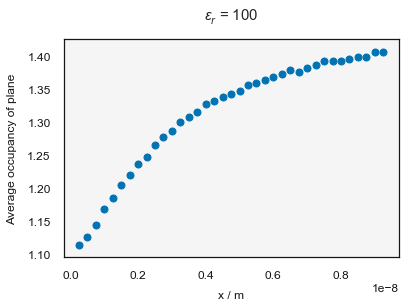

In [4]:
distri = np.zeros((37,200))

for j in range(40):
    path = "./04_12_20/04_12_20_Sam/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])
    
for j in range(40):
    path = "./04_12_20/04_12_20_for/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri[:,80 + 2 * j] = distribution_data[38:]
    distri[:,80 + 2 * j + 1] = np.flip(distribution_data[:37])
    
for j in range(20):
    path = "./04_12_20/04_12_20_Jacob/calc_{}/average_occupancy.json".format(40+j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri[:,160 + 2 * j] = distribution_data[38:]
    distri[:,160 + 2 * j + 1] = np.flip(distribution_data[:37])



distributions = np.mean(distri, axis = 1 )

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  / np.sqrt(200)

all_105_distributions[:,12] = distributions
all_105_errors[:,12] = err
all_105_errors_sd[:,12] = err * np.sqrt(200)

x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(100))
plt.show()

In [5]:
data_dictionary = {}

for i in range(13):
    data_dictionary["distribution_{}".format(perms[i])] = list(all_105_distributions[:,i])
    data_dictionary["standard_deviations_{}".format(perms[i])] = list(all_105_errors_sd[:,i])
    data_dictionary["standard_errors_{}".format(perms[i])] = list(all_105_errors[:,i])

NameError: name 'perms' is not defined

In [ ]:
with open('105_charges_distributions_errors.json', 'w') as outfile:
    json.dump(data_dictionary, outfile)

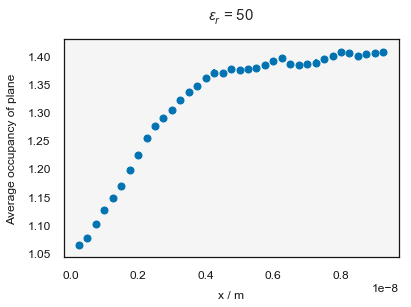

In [6]:
distri = np.zeros((37,100))

for j in range(50):
    path = "./08_12_20/charges_105/perm_50/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])
    


distributions = np.mean(distri, axis = 1 )

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  / np.sqrt(100)
    
all_105_distributions[:,10] = distributions
all_105_errors[:,10] = err
all_105_errors_sd[:,10] = err * np.sqrt(100)


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(50))

plt.savefig("perm_50+c_105.pdf")
plt.show()

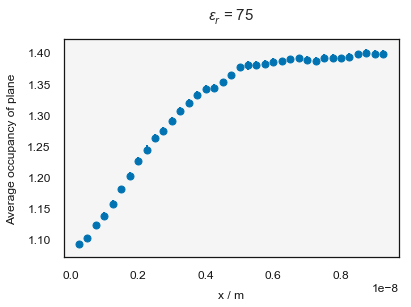

In [7]:
distri = np.zeros((37,100))

for j in range(50):
    path = "./08_12_20/charges_105/perm_75/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])
    

distributions = np.mean(distri, axis = 1 )

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  / np.sqrt(100)
    
all_105_distributions[:,11] = distributions
all_105_errors[:,11] = err
all_105_errors_sd[:,11] = err * np.sqrt(100)


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(75))

plt.savefig("perm_75+c_105.pdf")
plt.show()

## charges 210

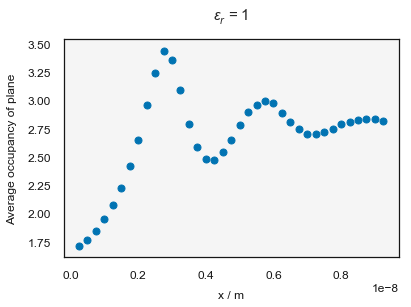

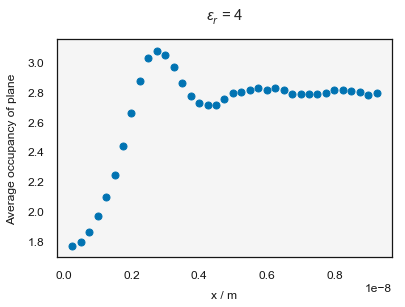

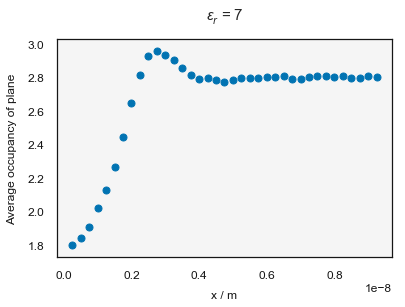

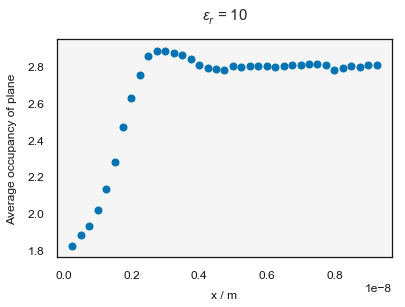

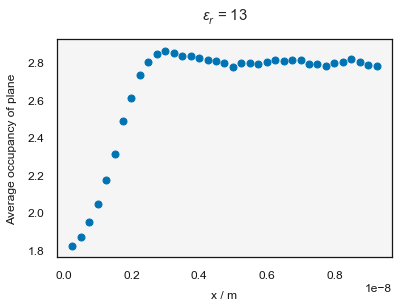

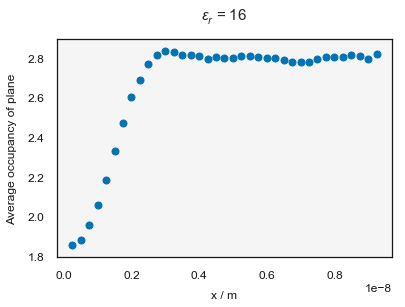

In [8]:

        
all_210_distributions = np.zeros((37,13))
all_210_errors = np.zeros((37,13))
all_210_errors_sd = np.zeros((37,13))

for h, g in enumerate([1,4,7,10,13,16]):
    distri = np.zeros((37,60))

    for j in range(10):
        
        path = "./27_11_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)
        
        path = "./27_11_20/charges_210/perm_{}/calc_{}/average_occupancy_second.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data_2 = data['average_occupancy']

        distribution_data_2 = np.roll(distribution_data_2,1)

        distri[:,2 * j] = 0.5*(distribution_data[38:] + distribution_data_2[38:])
        distri[:,2 * j + 1] = 0.5*(np.flip(distribution_data[:37]) + np.flip(distribution_data_2[:37]))  
        
        path = "./07_12_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)
        
        path = "./07_12_20/charges_210/perm_{}/calc_{}/average_occupancy_first.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data_2 = data['average_occupancy']

        distribution_data_2 = np.roll(distribution_data_2,1)

        distri[:,20+2 * j] = 0.5*(distribution_data[38:] + distribution_data_2[38:])
        distri[:,20+2 * j + 1] = 0.5*(np.flip(distribution_data[:37]) + np.flip(distribution_data_2[:37]))   
        

    for j in range(5):

        path = "./24_12_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])

        path = "./25_12_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])

    distributions = np.mean(distri, axis = 1 )
    
    all_210_distributions[:,h] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  / np.sqrt(60)
        
    all_210_errors[:,h] = err
    all_210_errors_sd[:,h] = err * np.sqrt(60)


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o")
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    plt.show()

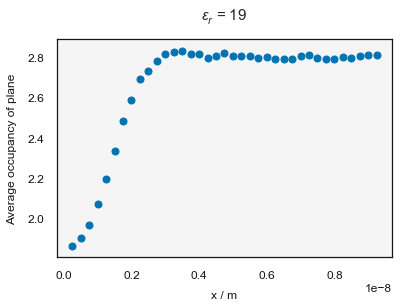

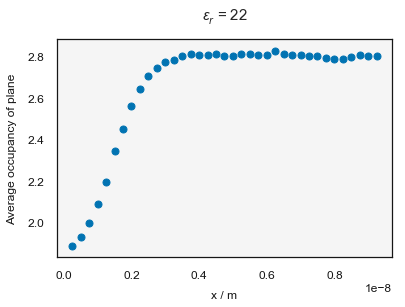

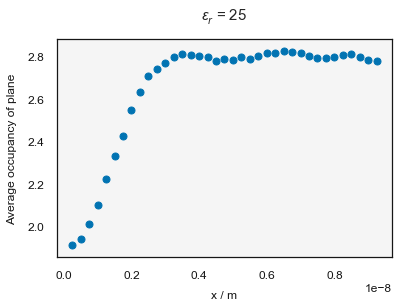

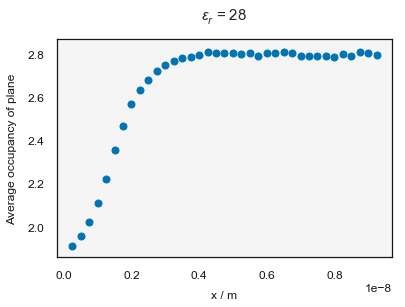

In [9]:
for h, g in enumerate([19,22,25,28]):
    distri = np.zeros((37,100))

    for j in range(10):
        path = "./27_11_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,2 * j] = distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        path = "./27_11_20/charges_210/perm_{}/calc_{}/average_occupancy_second.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,2 * j] = 0.5*(distribution_data[38:] + distribution_data_2[38:])
        distri[:,2 * j + 1] = 0.5*(np.flip(distribution_data[:37]) + np.flip(distribution_data_2[:37]))

        path = "./07_12_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)
        

        path = "./07_12_20/charges_210/perm_{}/calc_{}/average_occupancy_first.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data_2 = data['average_occupancy']

        distribution_data_2 = np.roll(distribution_data_2,1)

        distri[:,20 + 2 * j] = 0.5*(distribution_data[38:] + distribution_data_2[38:])
        distri[:,20 +2 * j + 1] = 0.5*(np.flip(distribution_data[:37]) + np.flip(distribution_data_2[:37]))

    for j in range(5):

        path = "./24_12_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])

        path = "./25_12_20/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        
    for j in range(20):

        path = "./06_01_21/charges_210/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,60 + 2 * j] = distribution_data[38:]
        distri[:,60 + 2 * j + 1] = np.flip(distribution_data[:37])


    distributions = np.mean(distri, axis = 1 )
    
    all_210_distributions[:,h+6] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  / np.sqrt(100)
        
    all_210_errors[:,h+6] = err
    all_210_errors_sd[:,h+6] = err * np.sqrt(100)


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o")
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    plt.show()

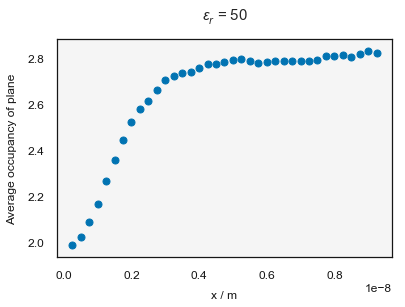

In [10]:
distri = np.zeros((37,100))

for j in range(50):
    path = "./07_12_20_Sam_results/perms_50_75/charges_210/perm_50/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])


distributions = np.mean(distri, axis = 1 )

all_210_distributions[:,10] = distributions

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  / np.sqrt(100)

all_210_errors[:,10] = err
all_210_errors_sd[:,10] = err * np.sqrt(100)


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(50))
plt.show()

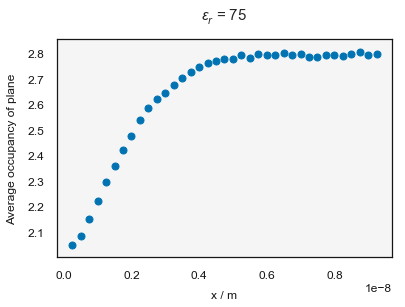

In [11]:
distri = np.zeros((37,98))

for j in range(50):
    if j != 13 and j != 49:
        path = "./07_12_20_Sam_results/perms_50_75/charges_210/perm_75/calc_{}/average_occupancy.json".format(j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,2 * j] = distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])

    if j == 49:
        path = "./07_12_20_Sam_results/perms_50_75/charges_210/perm_75/calc_{}/average_occupancy.json".format(j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,2 * 13] = distribution_data[38:]
        distri[:,2 * 13 + 1] = np.flip(distribution_data[:37])


distributions = np.mean(distri, axis = 1 )

all_210_distributions[:,11] = distributions

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  / np.sqrt(98)

all_210_errors[:,11] = err
all_210_errors_sd[:,11] = err * np.sqrt(100)


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(75))
plt.show()

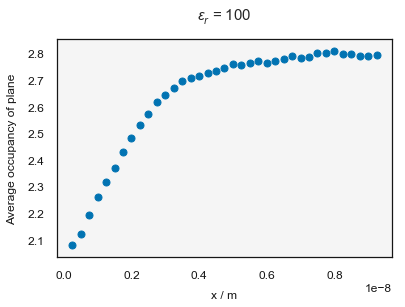

In [12]:
distri = np.zeros((37,160))

for j in range(80):
    path = "./09_12_20/charges_210/perm_100/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])


distributions = np.mean(distri, axis = 1 )

all_210_distributions[:,12] = distributions

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  / np.sqrt(200)

all_210_errors[:,12] = err
all_210_errors_sd[:,12] = err * np.sqrt(200)


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(100))
plt.show()

## charges 421

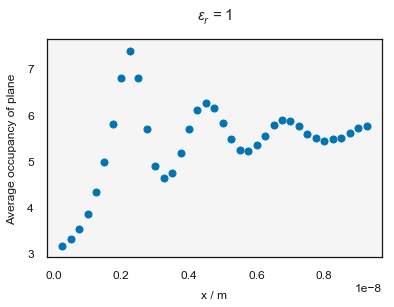

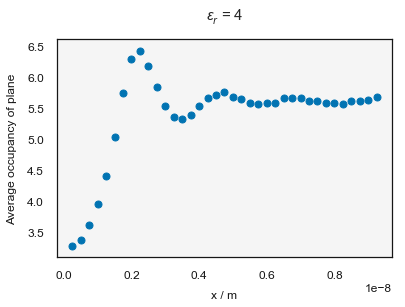

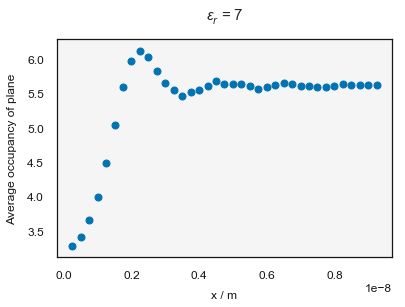

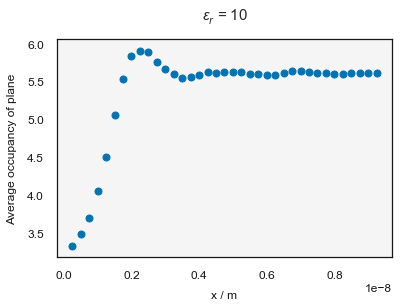

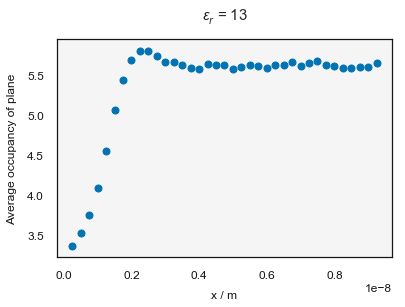

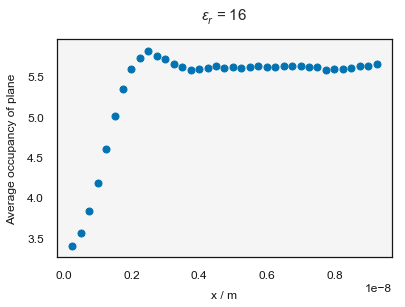

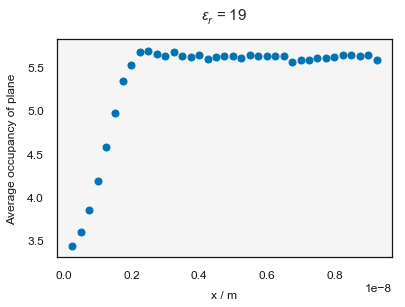

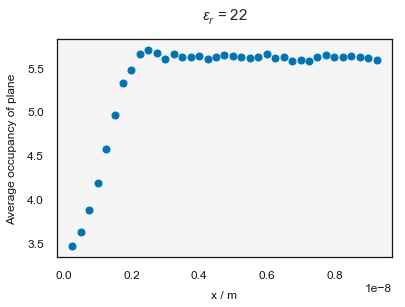

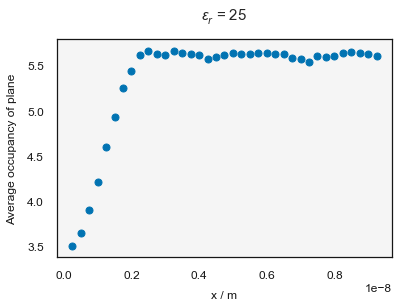

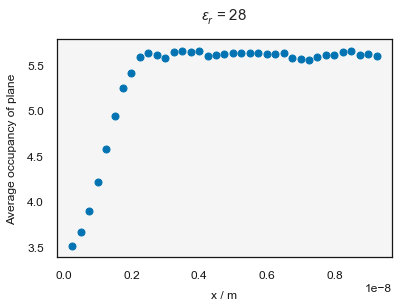

In [13]:
all_421_distributions = np.zeros((37,13))
all_421_errors = np.zeros((37,13))
all_421_errors_sd = np.zeros((37,13))

for h, g in enumerate([1,4,7,10,13,16]):
    distri = np.zeros((37,60))

    for j in range(10):
        path = "./27_11_20_Sam/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,2 * j] = distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        path = "./27_11_20_Sam/charges_421/perm_{}/calc_{}/average_occupancy_first.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data_2 = data['average_occupancy']

        distribution_data_2 = np.roll(distribution_data_2,1)

        distri[:,2 * j] = 0.5*(distribution_data[38:] + distribution_data_2[38:])
        distri[:,2 * j + 1] = 0.5*(np.flip(distribution_data[:37]) + np.flip(distribution_data_2[:37]))

        path = "./07_12_20/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)


        path = "./07_12_20/charges_421/perm_{}/calc_{}/average_occupancy_first.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data_2 = data['average_occupancy']

        distribution_data_2 = np.roll(distribution_data_2,1)

        distri[:,20+2 * j] = 0.5*(distribution_data[38:] + distribution_data_2[38:])
        distri[:,20+2 * j + 1] = 0.5*(np.flip(distribution_data[:37]) + np.flip(distribution_data_2[:37]))

    for j in range(5):

        path = "./24_12_20/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])

        path = "./25_12_20/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        
    distributions = np.mean(distri, axis = 1 )
    
    all_421_distributions[:,h] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  / np.sqrt(60)
        
    all_421_errors[:,h] = err
    all_421_errors_sd[:,h] = err * np.sqrt(60)


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o")
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    plt.show()
        
    
        
for h, g in enumerate([19,22,25,28]):
    distri = np.zeros((37,100))

    for j in range(10):
        path = "./27_11_20_Sam/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,2 * j] = distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
        path = "./27_11_20_Sam/charges_421/perm_{}/calc_{}/average_occupancy_first.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,2 * j] = 0.5*(distribution_data[38:] + distribution_data_2[38:])
        distri[:,2 * j + 1] = 0.5*(np.flip(distribution_data[:37]) + np.flip(distribution_data_2[:37]))

        path = "./07_12_20/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)


        path = "./07_12_20/charges_421/perm_{}/calc_{}/average_occupancy_first.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,20+2 * j] = 0.5*(distribution_data[38:] + distribution_data_2[38:])
        distri[:,20+2 * j + 1] = 0.5*(np.flip(distribution_data[:37]) + np.flip(distribution_data_2[:37]))

    for j in range(5):

        path = "./24_12_20/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,40 + 2 * j] = distribution_data[38:]
        distri[:,40 + 2 * j + 1] = np.flip(distribution_data[:37])

        path = "./25_12_20/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,50 + 2 * j] = distribution_data[38:]
        distri[:,50 + 2 * j + 1] = np.flip(distribution_data[:37])
        
    for j in range(20):

        path = "./06_01_21/charges_421/perm_{}/calc_{}/average_occupancy.json".format(g,j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,60 + 2 * j] = distribution_data[38:]
        distri[:,60 + 2 * j + 1] = np.flip(distribution_data[:37])

        

    distributions = np.mean(distri, axis = 1 )
    
    all_421_distributions[:,h+6] = distributions

    err = np.zeros(37)

    for k in range(37):
        err[k] = np.std(distri[k,:])  / np.sqrt(100)
        
    all_421_errors[:,h+6] = err
    all_421_errors_sd[:,h+6] = err * np.sqrt(100)


    x = np.array(range(1,38))*2.5e-10

    plt.errorbar(x, distributions, err, fmt="o")
    plt.xlabel(r"x / m")
    plt.ylabel(r"Average occupancy of plane")
    plt.title(r"$\epsilon_{r}$ = " + str(g))
    plt.show()

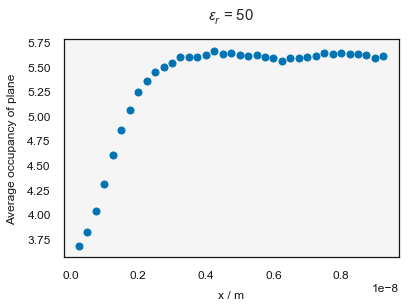

In [14]:
distri = np.zeros((37,90))

for j in range(1,47):
    if j != 36 and j != 46 and j != 42 and j != 45:
        path = "./07_12_20_Sam_results/perms_50_75/charges_421/perm_50/calc_{}/average_occupancy.json".format(j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,2 * j] = distribution_data[38:]
        distri[:,2 * j + 1] = np.flip(distribution_data[:37])
        
    if j == 45:
        path = "./07_12_20_Sam_results/perms_50_75/charges_421/perm_50/calc_{}/average_occupancy.json".format(j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,2 * 36] = distribution_data[38:]
        distri[:,2 * 36 + 1] = np.flip(distribution_data[:37])
       
    if j == 46:
        path = "./07_12_20_Sam_results/perms_50_75/charges_421/perm_50/calc_{}/average_occupancy.json".format(j)

        with open(path) as json_file:
            data = json.load(json_file)

        distribution_data = data['average_occupancy']

        distribution_data = np.roll(distribution_data,1)

        distri[:,2 * 42] = distribution_data[38:]
        distri[:,2 * 42 + 1] = np.flip(distribution_data[:37])
        
path = "./07_12_20_Sam_results/perms_50_75/charges_421/perm_50/calc_{}/average_occupancy.json".format(1)

with open(path) as json_file:
    data = json.load(json_file)

distribution_data = data['average_occupancy']

distribution_data = np.roll(distribution_data,1)

distri[:,1] = distribution_data[38:]
distri[:,1] = np.flip(distribution_data[:37])
        

distri = np.delete(distri, 0,1)
distributions = np.mean(distri, axis = 1 )

all_421_distributions[:,10] = distributions

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  / np.sqrt(89)

all_421_errors[:,10] = err
all_421_errors_sd[:,10] = err * np.sqrt(89)


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(50))
# for i in range(89):
#     plt.plot(x, distri[:,i], '-')
#     plt.savefig("perm_{}+c_105.pdf".format(g))
plt.show()

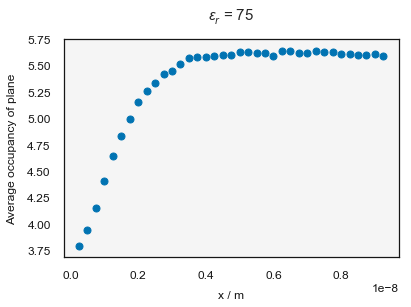

In [15]:
distri = np.zeros((37,100))

for j in range(50):
    path = "./07_12_20_Sam_results/perms_50_75/charges_421/perm_75/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])


distributions = np.mean(distri, axis = 1 )

all_421_distributions[:,11] = distributions

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  / np.sqrt(100)

all_421_errors[:,11] = err
all_421_errors_sd[:,11] = err * np.sqrt(100)


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(75))
#     for i in range(60):
#         plt.plot(x, distri[:,i], '-')
#     plt.savefig("perm_{}+c_105.pdf".format(g))
plt.show()

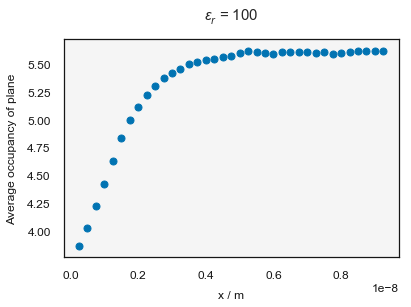

In [16]:
distri = np.zeros((37,160))

for j in range(80):
    path = "./07_12_20_Sam_results/perm_100/charges_421/perm_100/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])


distributions = np.mean(distri, axis = 1 )

all_421_distributions[:,12] = distributions

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  / np.sqrt(160)

all_421_errors[:,12] = err
all_421_errors_sd[:,12] = err * np.sqrt(160)


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions, err, fmt="o")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(100))
#     for i in range(60):
#         plt.plot(x, distri[:,i], '-')
#     plt.savefig("perm_{}+c_105.pdf".format(g))
plt.show()

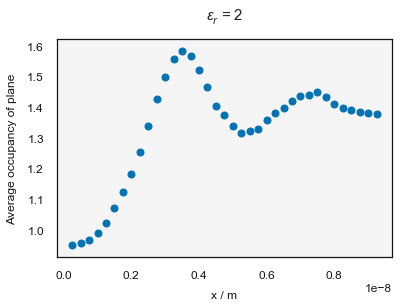

In [17]:
distri = np.zeros((37,60))

for j in range(30):
    path = "./13_01_21/charges_105/perm_2/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])



distribution_perm_2_charges_105 = np.mean(distri, axis = 1 )

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  / np.sqrt(60)

perm_2_charges_105_errors= err


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distribution_perm_2_charges_105, perm_2_charges_105_errors,fmt="o")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(2))
plt.show()


### Perm = 2, charges = 210

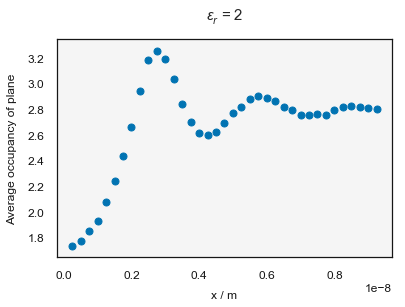

In [18]:
distri = np.zeros((37,60))

for j in range(30):
    path = "./13_01_21/charges_210/perm_2/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])



distribution_perm_2_charges_210 = np.mean(distri, axis = 1 )

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  / np.sqrt(60)

perm_2_charges_210_errors= err


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distribution_perm_2_charges_210, perm_2_charges_210_errors,fmt="o")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(2))
plt.show()


### Perm = 2, charges = 421

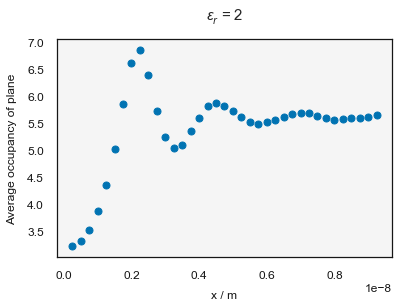

In [19]:
distri = np.zeros((37,60))

for j in range(30):
    path = "./13_01_21/charges_421/perm_2/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri[:,2 * j] = distribution_data[38:]
    distri[:,2 * j + 1] = np.flip(distribution_data[:37])



distribution_perm_2_charges_421 = np.mean(distri, axis = 1 )

err = np.zeros(37)

for k in range(37):
    err[k] = np.std(distri[k,:])  / np.sqrt(60)

perm_2_charges_421_errors= err


x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distribution_perm_2_charges_421, perm_2_charges_421_errors,fmt="o")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(2))
plt.show()


In [ ]:
import numpy as np
import json
import matplotlib.pyplot as plt
distri_1 = np.zeros((37,60))

for j in range(30):
    path = "./20_01_21/charges_2109/perm_1/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri_1[:,2 * j] = distribution_data[38:]
    distri_1[:,2 * j + 1] = np.flip(distribution_data[:37])
    gb.append(distribution_data[37])

    
distributions_1 = np.mean(distri_1, axis = 1 )

err_1 = np.zeros(37)

for k in range(37):
    err_1[k] = np.std(distri_1[k,:])  / np.sqrt(60)



x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions_1, err_1, fmt="o-")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(1))
plt.hlines( 2109 / 75,0, 37*2.5e-10, linestyles = "dotted")
plt.show()

In [ ]:
distri_10 = np.zeros((37,60))
gb = []
for j in range(30):
    path = "./21_01_21/charges_2109/perm_10/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri_10[:,2 * j] = distribution_data[38:]
    distri_10[:,2 * j + 1] = np.flip(distribution_data[:37])
    gb.append(distribution_data[37])

    
distributions_10 = np.mean(distri_10, axis = 1 )
print("gb = ", np.mean(gb))


err_10 = np.zeros(37)

for k in range(37):
    err_10[k] = np.std(distri_10[k,:])  / np.sqrt(60)



x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions_10, err_10, fmt="o-")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(10))
plt.hlines( 2109 / 75,0, 37*2.5e-10, linestyles = "dotted")
plt.show()

In [ ]:
distri_100 = np.zeros((37,654))
gb = []
niter = 0
for j in range(20):
    path = "./17_01_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri_100[:,2 * j] = distribution_data[38:]
    distri_100[:,2 * j + 1] = np.flip(distribution_data[:37])
    gb.append(distribution_data[37])
    niter += 2
    
for j in range(30):
    path = "./18_01_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri_100[:,40+2 * j] = distribution_data[38:]
    distri_100[:,40+2 * j + 1] = np.flip(distribution_data[:37])
    gb.append(distribution_data[37])
    niter += 2
    
for j in range(30):
    path = "./19_01_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri_100[:,100+2 * j] = distribution_data[38:]
    distri_100[:,100+2 * j + 1] = np.flip(distribution_data[:37])
    gb.append(distribution_data[37])
    niter += 2
    
for j in range(21):
    path = "./04_02_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri_100[:,160+2 * j] = distribution_data[38:]
    distri_100[:,160+2 * j + 1] = np.flip(distribution_data[:37])
    gb.append(distribution_data[37])
    niter += 2
    
for j in range(22,50):
    path = "./04_02_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri_100[:,202+2 * (j-22)] = distribution_data[38:]
    distri_100[:,202+2 * (j-22) + 1] = np.flip(distribution_data[:37])
    gb.append(distribution_data[37])
    niter += 2
    
for j in range(50):
    path = "./05_02_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri_100[:,258+2 * j] = distribution_data[38:]
    distri_100[:,258+2 * j + 1] = np.flip(distribution_data[:37])
    gb.append(distribution_data[37])
    niter += 2
    
for j in range(51,100):
    path = "./05_02_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri_100[:,358+2 * (j-51)] = distribution_data[38:]
    distri_100[:,358+2 * (j-51) + 1] = np.flip(distribution_data[:37])
    gb.append(distribution_data[37])
    niter += 2
    
for j in range(50):
    path = "./07_02_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri_100[:,456+2 * (j)] = distribution_data[38:]
    distri_100[:,456+2 * (j) + 1] = np.flip(distribution_data[:37])
    gb.append(distribution_data[37])
    niter += 2
    
for j in range(51,100):
    path = "./07_02_21/charges_2109/perm_100/calc_{}/average_occupancy.json".format(j)

    with open(path) as json_file:
        data = json.load(json_file)

    distribution_data = data['average_occupancy']

    distribution_data = np.roll(distribution_data,1)

    distri_100[:,556+2 * (j-51)] = distribution_data[38:]
    distri_100[:,556+2 * (j-51) + 1] = np.flip(distribution_data[:37])
    gb.append(distribution_data[37])
    niter += 2
    


    
distributions_100 = np.mean(distri_100, axis = 1 )
print("gb = ", np.mean(gb))
print(niter)


err_100 = np.zeros(37)

for k in range(37):
    err_100[k] = np.std(distri_100[k,:])  / np.sqrt(654)



x = np.array(range(1,38))*2.5e-10

plt.errorbar(x, distributions_100, err_100, fmt="o-")
plt.xlabel(r"x / m")
plt.ylabel(r"Average occupancy of plane")
plt.title(r"$\epsilon_{r}$ = " + str(100))
plt.hlines( 2109 / 75,0, 37*2.5e-10, linestyles = "dotted")
#     for i in range(60):
#         plt.plot(x, distri[:,i], '-')
#     plt.savefig("perm_{}+c_105.pdf".format(g))
plt.show()

In [ ]:
from matplotlib import rc, rcParams
from collections import OrderedDict
# ---------------------------------------------------
# Color sets
# ---------------------------------------------------
#Standard tableau 20 set
tableau = OrderedDict([
        ("blue", "#0173B2"),
        ("orange", "#DE8F05"),
        ("green", "#029E73"),
        ("red", "#D55E00"),
        ("purple", "#CC78BC"),
        ("brown", "#CA9161"),
        ("pink", "#FBAFE4"),
        ("grey", "#949494"),
        ("yellow", "#ECE133"),
        ("turquoise", "#56B4E9"),
])
fontsize=15
nearly_black = '#333333'
light_grey = '#EEEEEE'
lighter_grey = '#F5F5F5'
white = '#ffffff'
grey = '#7F7F7F'
master_formatting = {'axes.formatter.limits': (-5,5),
                     'axes.titlepad':10,
                          'xtick.major.pad': 7,
                          'ytick.major.pad': 7,
                          'ytick.color': nearly_black,
                          'xtick.color': nearly_black,
                          'axes.labelcolor': nearly_black,
                          'axes.linewidth': .5,
                          'axes.edgecolor' : nearly_black,
                          'axes.spines.bottom': True,
                          'axes.spines.left': True,
                          'axes.spines.right': True,
                          'axes.spines.top': True,
                          'axes.axisbelow': True,
                          'legend.frameon': False,
                          'lines.linewidth': 1.25,
                          'pdf.fonttype': 42,
                          'ps.fonttype': 42,
                          'font.size': fontsize,
                          'font.sans-serif' : 'Helvetica Neue',
                          'text.usetex': False,
                          'savefig.bbox':'tight',
                          'axes.facecolor': white,
                          'axes.labelpad': 10.0,
                          'axes.labelsize': fontsize,
                          'axes.titlesize': fontsize,
                          'axes.grid': False,
                          'lines.markersize': 7.0,
                          'lines.scale_dashes': False,
                          'xtick.labelsize': fontsize,
                          'ytick.labelsize': fontsize,
                          'legend.fontsize': fontsize,
                          'figure.figsize':[5.5,5.5]}

for k, v in master_formatting.items():
    rcParams[k] = v
color_cycle = tableau.values()
try:
    from matplotlib import cycler
    rcParams['axes.prop_cycle'] = cycler(color=color_cycle)
except Exception:
    raise

In [ ]:
y_100 = np.array(distributions_100) / 75**2
y_10 = np.array(distributions_10) / 75**2
y_1 = np.array(distributions_1) / 75**2
x = np.array(range(1,38)) * 2.5e-10
x_smooth = np.linspace(5e-10, 37*2.5e-10, 100000)
x_smooth_2 = np.linspace(6.6e-10, 37*2.5e-10, 100000)
x_smooth_3 = np.linspace(6.4e-10, 37*2.5e-10, 100000)

# linear plots

fig, axs = plt.subplots(1, 3, figsize=(15.5, 5), sharey='row')
plt.subplots_adjust(hspace = 0.35)
axs[0].plot(x*1e9, y_100, "o", label = "simulated")
axs[0].plot(x_smooth*1e9, func_exp(x_smooth, values_100_dilute[0], values_100_dilute[1], values_100_dilute[2]) / 75**2, label = "monotonic", alpha = 0.7, linewidth = 1.5)
axs[0].plot(x_smooth*1e9, func_osc(x_smooth, values_100_osc[0], values_100_osc[1], values_100_osc[2], values_100_osc[3], values_100_osc[4])/ 75**2,label = "oscillatory", alpha = 0.7, linewidth = 1.5)
# axs[0].legend(loc = 4)

axs[1].plot(x*1e9, y_10, "o", label = "simulated")
axs[1].plot(x_smooth*1e9, func_exp(x_smooth, values_10_dilute[0], values_10_dilute[1], values_10_dilute[2])/ 75**2 , label = "monotonic", alpha = 0.7, linewidth = 2)
axs[1].plot(x_smooth_3*1e9, func_osc(x_smooth_3, values_10_osc[0], values_10_osc[1], values_10_osc[2], values_10_osc[3], values_10_osc[4])/ 75**2,label = "oscillatory", alpha = 0.7, linewidth = 2)
# axs[1].legend(loc = 4)

axs[2].plot(x*1e9, y_1, "o", label = "simulated")
axs[2].plot(x_smooth*1e9, func_exp(x_smooth, values_1_dilute[0], values_1_dilute[1], values_1_dilute[2])/ 75**2, '-',label = "monotonic", alpha = 0.7, linewidth = 2)
axs[2].plot(x_smooth_2*1e9, func_osc(x_smooth_2, values_1_osc[0], values_1_osc[1], values_1_osc[2], values_1_osc[3], values_1_osc[4])/ 75**2, '-', label = "oscillatory", alpha = 0.7, linewidth = 2)
axs[2].legend(loc = 4)

# log plots

# y_100_exp = func_exp(x_smooth, popt_100_d[0], popt_100_d[1], popt_100_d[2])
# y_100_osc = func_osc(x_smooth, popt_100_o[0], popt_100_o[1], popt_100_o[2], popt_100_o[3], popt_100_o[4])

# axs[1,0].plot(x*1e9, np.log(np.abs(y_100- popt_100_o[2])), 'o', label = "sim")
# axs[1,0].plot(x_smooth*1e9, np.log(np.abs(y_100_exp - popt_100_d[2])), '-', label = "exp")
# axs[1,0].plot(x_smooth*1e9, np.log(np.abs(y_100_osc - popt_100_o[2])), '-', label = "osc")
# axs[1,0].legend(loc = 4)

# y_10_exp = func_exp(x_smooth, popt_10_d[0], popt_10_d[1], popt_10_d[2])
# y_10_osc = func_osc(x_smooth, popt_10_o[0], popt_10_o[1], popt_10_o[2], popt_10_o[3], popt_10_o[4])

# axs[1,1].plot(x*1e9, np.log(np.abs(y_10- popt_10_o[2])), 'o', label = "sim")
# axs[1,1].plot(x_smooth*1e9, np.log(np.abs(y_10_exp - popt_10_d[2])), '-', label = "exp")
# axs[1,1].plot(x_smooth*1e9, np.log(np.abs(y_10_osc - popt_10_o[2])), '-', label = "osc")
# axs[1,1].legend(loc = 4)

# y_1_exp = func_exp(x_smooth, popt_1_d[0], popt_1_d[1], popt_1_d[2])
# y_1_osc = func_osc(x_smooth, popt_1_o[0], popt_1_o[1], popt_1_o[2], popt_1_o[3], popt_1_o[4])

# axs[1,2].plot(x*1e9, np.log(np.abs(y_1- popt_1_o[2])), 'o', label = "sim")
# axs[1,2].plot(x_smooth*1e9, np.log(np.abs(y_1_exp - popt_1_d[2])), '-', label = "exp")
# axs[1,2].plot(x_smooth*1e9, np.log(np.abs(y_1_osc - popt_1_o[2])), '-', label = "osc")
# axs[1,2].legend(loc = 4)
# axs[1,2].set_ylim(-20,-5)


axs[0].set_ylabel(r"$n(x)$")
# axs[1,0].set_ylabel(r"$\ln(|c(x) - c(\infty)|)$")
axs[0].set_xlabel(r"$x$ / nm")
axs[1].set_xlabel(r"$x$ / nm")
axs[2].set_xlabel(r"$x$ / nm")

axs[0].set_title(r"$\varepsilon_{r}$ = 100")
axs[1].set_title(r"$\varepsilon_{r}$ = 10")
axs[2].set_title(r"$\varepsilon_{r}$ = 1")

axs[0].hlines( 2109 / 75**3,0, 10, color = nearly_black, linestyles = "dotted")
axs[1].hlines( 2109 / 75**3,0, 10, color = nearly_black, linestyles = "dotted")
axs[2].hlines( 2109 / 75**3,0, 10, color = nearly_black, linestyles = "dotted")
axs[0].set_xticks([0, 2.5, 5, 7.5, 10])
axs[1].set_xticks([0, 2.5, 5, 7.5, 10])
axs[2].set_xticks([0, 2.5, 5, 7.5, 10])
# axs[0].set_yticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
axs[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False, bottom = True, color = grey)        # ticks along the top edge are off
axs[0].tick_params(
    axis='y',          # changes apply to the x-axis
    left=True,  color = grey)        # ticks along the top edge are off
axs[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False, bottom = True, color = grey)        # ticks along the top edge are off
axs[1].tick_params(
    axis='y',          # changes apply to the x-axis
    left=True,  color = grey)        # ticks along the top edge are off
axs[2].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False, bottom = True, color = grey)        # ticks along the top edge are off
axs[2].tick_params(
    axis='y',          # changes apply to the x-axis
    left=True,  color = grey)        # ticks along the top edge are off
# axs[1,0].set_xticks([0, 2.5, 5, 7.5, 10])
# axs[1,1].set_xticks([0, 2.5, 5, 7.5, 10])
# axs[1,2].set_xticks([0, 2.5, 5, 7.5, 10])

textstr = r'$2\ln (B_{10})=$%.0f' % (int(bayes_100.nominal_value))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', alpha=0.5, facecolor = grey)

# place a text box in upper left in axes coords
axs[0].text(0.56, 0.95, textstr, transform=axs[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

textstr = r'$2\ln (B_{10})=$%.0f' % (int(bayes_10.nominal_value))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', alpha=0.5, facecolor = grey)

# place a text box in upper left in axes coords
axs[1].text(0.5, 0.95, textstr, transform=axs[1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

textstr = r'$2\ln (B_{10})=$%.0f' % (int(bayes_1.nominal_value))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', alpha=0.5, facecolor = grey)

# place a text box in upper left in axes coords
axs[2].text(0.5, 0.95, textstr, transform=axs[2].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.savefig("/Users/jacobdean/Pictures/fig1_formatting_uravu.pdf")


plt.show()

In [ ]:
y_100 = np.array(distributions_100) / 75**2
y_10 = np.array(distributions_10) / 75**2
y_1 = np.array(distributions_1) / 75**2
x_smooth = np.linspace(5e-10, 37*2.5e-10, 100000)
x_smooth_2 = np.linspace(6.6e-10, 37*2.5e-10, 100000)

# linear plots

fig, axs = plt.subplots(1, 3, figsize=(15.5, 5), sharey='row')
plt.subplots_adjust(hspace = 0.35)
axs[0].plot(x*1e9, y_100, "o", label = "simulated")
axs[0].plot(x_smooth*1e9, func_exp(x_smooth, popt_100_d[0], popt_100_d[1], popt_100_d[2]), label = "monotonic", alpha = 0.7, linewidth = 1.5)
axs[0].plot(x_smooth*1e9, func_osc(x_smooth, popt_100_o[0], popt_100_o[1], popt_100_o[2], popt_100_o[3], popt_100_o[4]),label = "oscillatory", alpha = 0.7, linewidth = 1.5)
# axs[0].legend(loc = 4)

axs[1].plot(x*1e9, y_10, "o", label = "simulated")
axs[1].plot(x_smooth*1e9, func_exp(x_smooth, popt_10_d[0], popt_10_d[1], popt_10_d[2]), label = "monotonic", alpha = 0.7, linewidth = 2)
axs[1].plot(x_smooth*1e9, func_osc(x_smooth, popt_10_o[0], popt_10_o[1], popt_10_o[2], popt_10_o[3], popt_10_o[4]),label = "oscillatory", alpha = 0.7, linewidth = 2)
# axs[1].legend(loc = 4)

axs[2].plot(x*1e9, y_1, "o", label = "simulated")
axs[2].plot(x_smooth*1e9, func_exp(x_smooth, popt_1_d[0], popt_1_d[1], popt_1_d[2]), '-',label = "monotonic", alpha = 0.7, linewidth = 2)
axs[2].plot(x_smooth_2*1e9, func_osc(x_smooth_2, popt_1_o[0], popt_1_o[1], popt_1_o[2], popt_1_o[3], popt_1_o[4]), '-', label = "oscillatory", alpha = 0.7, linewidth = 2)
axs[2].legend(loc = 4)

# log plots

# y_100_exp = func_exp(x_smooth, popt_100_d[0], popt_100_d[1], popt_100_d[2])
# y_100_osc = func_osc(x_smooth, popt_100_o[0], popt_100_o[1], popt_100_o[2], popt_100_o[3], popt_100_o[4])

# axs[1,0].plot(x*1e9, np.log(np.abs(y_100- popt_100_o[2])), 'o', label = "sim")
# axs[1,0].plot(x_smooth*1e9, np.log(np.abs(y_100_exp - popt_100_d[2])), '-', label = "exp")
# axs[1,0].plot(x_smooth*1e9, np.log(np.abs(y_100_osc - popt_100_o[2])), '-', label = "osc")
# axs[1,0].legend(loc = 4)

# y_10_exp = func_exp(x_smooth, popt_10_d[0], popt_10_d[1], popt_10_d[2])
# y_10_osc = func_osc(x_smooth, popt_10_o[0], popt_10_o[1], popt_10_o[2], popt_10_o[3], popt_10_o[4])

# axs[1,1].plot(x*1e9, np.log(np.abs(y_10- popt_10_o[2])), 'o', label = "sim")
# axs[1,1].plot(x_smooth*1e9, np.log(np.abs(y_10_exp - popt_10_d[2])), '-', label = "exp")
# axs[1,1].plot(x_smooth*1e9, np.log(np.abs(y_10_osc - popt_10_o[2])), '-', label = "osc")
# axs[1,1].legend(loc = 4)

# y_1_exp = func_exp(x_smooth, popt_1_d[0], popt_1_d[1], popt_1_d[2])
# y_1_osc = func_osc(x_smooth, popt_1_o[0], popt_1_o[1], popt_1_o[2], popt_1_o[3], popt_1_o[4])

# axs[1,2].plot(x*1e9, np.log(np.abs(y_1- popt_1_o[2])), 'o', label = "sim")
# axs[1,2].plot(x_smooth*1e9, np.log(np.abs(y_1_exp - popt_1_d[2])), '-', label = "exp")
# axs[1,2].plot(x_smooth*1e9, np.log(np.abs(y_1_osc - popt_1_o[2])), '-', label = "osc")
# axs[1,2].legend(loc = 4)
# axs[1,2].set_ylim(-20,-5)


axs[0].set_ylabel(r"$n(x)$")
# axs[1,0].set_ylabel(r"$\ln(|c(x) - c(\infty)|)$")
axs[0].set_xlabel(r"$x$ / nm")
axs[1].set_xlabel(r"$x$ / nm")
axs[2].set_xlabel(r"$x$ / nm")
# axs[1,0].set_xlabel(r"x / nm")
# axs[1,1].set_xlabel(r"x / nm")
# axs[1,2].set_xlabel(r"x / nm")
axs[0].set_title(r"$\varepsilon_{r}$ = " + str(100))
axs[1].set_title(r"$\varepsilon_{r}$ = " + str(10))
axs[2].set_title(r"$\varepsilon_{r}$ = " + str(1))
axs[0].hlines( 2109 / 75**3,0, 10, color = nearly_black, linestyles = "dotted")
axs[1].hlines( 2109 / 75**3,0, 10, color = nearly_black, linestyles = "dotted")
axs[2].hlines( 2109 / 75**3,0, 10, color = nearly_black, linestyles = "dotted")
axs[0].set_xticks([0, 2.5, 5, 7.5, 10])
axs[1].set_xticks([0, 2.5, 5, 7.5, 10])
axs[2].set_xticks([0, 2.5, 5, 7.5, 10])
# axs[0].set_yticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
axs[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False, bottom = True, color = grey)        # ticks along the top edge are off
axs[0].tick_params(
    axis='y',          # changes apply to the x-axis
    left=True,  color = grey)        # ticks along the top edge are off
axs[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False, bottom = True, color = grey)        # ticks along the top edge are off
axs[1].tick_params(
    axis='y',          # changes apply to the x-axis
    left=True,  color = grey)        # ticks along the top edge are off
axs[2].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False, bottom = True, color = grey)        # ticks along the top edge are off
axs[2].tick_params(
    axis='y',          # changes apply to the x-axis
    left=True,  color = grey)        # ticks along the top edge are off
# axs[1,0].set_xticks([0, 2.5, 5, 7.5, 10])
# axs[1,1].set_xticks([0, 2.5, 5, 7.5, 10])
# axs[1,2].set_xticks([0, 2.5, 5, 7.5, 10])
# plt.savefig("/Users/jacobdean/Pictures/fig1_formatting.pdf")
plt.show()

In [ ]:
plt.plot(x*1e9, y_1, "o", label = "simulated")
plt.plot(x_smooth*1e9, func_exp(x_smooth, popt_1_d[0], popt_1_d[1], popt_1_d[2]), '-',label = "monotonic", alpha = 0.7, linewidth = 3)
plt.plot(x_smooth_2*1e9, func_osc(x_smooth_2, popt_1_o[0], popt_1_o[1], popt_1_o[2], popt_1_o[3], popt_1_o[4]), '-', label = "oscillatory", alpha = 0.7, linewidth = 3)
plt.legend(loc = 4)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False, bottom = True, color = grey)        # ticks along the top edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    left=True,  color = grey) 

plt.title(r"$ n_{\infty} = 0.005 , \varepsilon_{r} = 1$")
plt.hlines( 2109 / 75**3,0, 10, color = nearly_black, linestyles = "dotted")
plt.xticks([0, 2.5, 5, 7.5, 10])
plt.ylabel(r"$n(x)$")
# axs[1,0].set_ylabel(r"$\ln(|c(x) - c(\infty)|)$")
plt.xlabel(r"x / nm")
plt.savefig("/Users/jacobdean/Pictures/oscillatory.pdf")
plt.show()

In [ ]:
def func_osc(x, alpha, A,f, b, c):
    return(f - A*np.exp(-alpha * x)*np.cos(b*x+c))

def func_exp(x, alpha, A,f):
    return(f - A*np.exp(-alpha * x))

from scipy.optimize import curve_fit

popt_100_d, covt_100_d = curve_fit(func_exp, x[1:], y_100[1:],p0 = (1e9, 0.005, 0.005))
popt_100_o, covt_100_o = curve_fit(func_osc, x[1:], y_100[1:], p0 = (1e9, 0.005, 0.005, 1e9, 5))
plt.plot(x, y_100, label = "sim")
plt.plot(x[1:], func_exp(x[1:], popt_100_d[0], popt_100_d[1], popt_100_d[2]), label = "exp")
plt.plot(x[1:], func_osc(x[1:], popt_100_o[0], popt_100_o[1], popt_100_o[2], popt_100_o[3], popt_100_o[4]),label = "osc")
plt.legend(loc = 4 )
plt.show()
popt_10_d, covt_10_d = curve_fit(func_exp, x[1:], y_10[1:], p0 = (1e9, 0.005, 0.005))
popt_10_o, covt_10_o = curve_fit(func_osc, x[1:], y_10[1:], p0 = (1e9, 0.005, 0.005, 1e9, 5))
plt.plot(x, y_10, label = "sim")
plt.plot(x[1:], func_exp(x[1:], popt_10_d[0], popt_10_d[1], popt_10_d[2]), label = "exp")
plt.plot(x[1:], func_osc(x[1:], popt_10_o[0], popt_10_o[1], popt_10_o[2], popt_10_o[3], popt_10_o[4]),label = "osc")
plt.legend(loc = 4 )
plt.show()
popt_1_d, covt_1_d = curve_fit(func_exp, x[1:], y_1[1:], p0 = (1e9, 0.005, 0.005))
popt_1_o, covt_1_o = curve_fit(func_osc, x[1:], y_1[1:], p0 = (1e9, 0.005, 0.005, 1e9, 5))
plt.plot(x, y_1, label = "sim")
plt.plot(x[1:], func_exp(x[1:], popt_1_d[0], popt_1_d[1], popt_1_d[2]), label = "exp")
plt.plot(x[1:], func_osc(x[1:], popt_1_o[0], popt_1_o[1], popt_1_o[2], popt_1_o[3], popt_1_o[4]), label = "osc")
plt.legend(loc = 4 )
plt.show()

In [ ]:
plt.plot(x, func_osc(x, 1e9, 0.005, 0.005, 1e9, 5))

In [ ]:

plt.figure(figsize= (6,6))
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    left=True,  color = grey)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=True,  color = grey)
plt.xticks([-3,-2,-1,0,1,2, 3], (-3, -2,-1,0,1,2,3))
plt.errorbar(x_105,y_bayes_105, alpha_dilute_105_err_normalised, fmt = 'o', label = "0.025%")
plt.errorbar(x_210,y_bayes_210, alpha_bayes_210_err_normalised, fmt = 'o', label = "0.05%")
plt.errorbar(x_421,y_bayes_421, alpha_bayes_421_err_normalised, fmt = 'o', label = "0.1%")
# plt.title("uravu determined values, bayes factor chooses model")
plt.xlim(-3,3)
plt.ylim(-1.25,4)
plt.xlabel(r"$\ln(a_{exclusion}/\lambda_{d})$")
plt.ylabel(r"$\ln(\lambda_{sim}/\lambda_{d})$")
plt.hlines(0, -3, 3, linestyles= "dashed")
plt.legend( loc = 2, prop={'size': 12})

plt.savefig("/Users/jacobdean/Pictures/fig_2_alex_format.pdf")
plt.show()

In [ ]:
figure_2 = {"x_105": list(x_105), 
            "y_105" : list(y_bayes_105), 
            "errors_y_105": [list(alpha_dilute_105_err_normalised[0]), list(alpha_dilute_105_err_normalised[1])],
            "x_210": list(x_210),
           "y_210": list(y_bayes_210),
           "errors_y_210": [list(alpha_bayes_210_err_normalised[0]), list(alpha_bayes_210_err_normalised[1])],
           "x_421": list(x_421),
           "y_421": list(y_bayes_421), 
           "errors_y_421": [list(alpha_bayes_421_err_normalised[0]), list(alpha_bayes_421_err_normalised[1])]}

with open('/Users/jacobdean/Documents/fig2.json', 'w') as outfile:
    json.dump(figure_2, outfile)

In [ ]:
data_se = {}
data_sd = {}

for i,j in enumerate([1,4,7,10,13,16,19,22,25,28,50,75,100]):
    data_se["y_105_{}".format(j)] = list(all_105_distributions[:,i])
    data_se["yerr_105_{}".format(j)] = list(all_105_errors[:,i])
    data_sd["y_105_{}".format(j)] = list(all_105_distributions[:,i])
    data_sd["yerr_105_{}".format(j)] = list(all_105_errors_sd[:,i])
    
    data_se["y_210_{}".format(j)] = list(all_210_distributions[:,i])
    data_se["yerr_210_{}".format(j)] = list(all_210_errors[:,i])
    data_sd["y_210_{}".format(j)] = list(all_210_distributions[:,i])
    data_sd["yerr_210_{}".format(j)] = list(all_210_errors_sd[:,i])
    
    data_se["y_421_{}".format(j)] = list(all_421_distributions[:,i])
    data_se["yerr_421_{}".format(j)] = list(all_421_errors[:,i])
    data_sd["y_421_{}".format(j)] = list(all_421_distributions[:,i])
    data_sd["yerr_421_{}".format(j)] = list(all_421_errors_sd[:,i])
    


In [ ]:
data_sd

In [ ]:
with open('data_se.json', 'w') as outfile:
    json.dump(data_se, outfile)

In [ ]:
def func_osc(x, alpha, A,f, b, c):
    return(f - A*np.exp(-alpha * x)*np.cos(b*x+c))

def func_exp(x, alpha, A,f):
    return(f - A*np.exp(-alpha * x))

In [ ]:
x = np.array(range(1,38))*2.5e-10

In [ ]:
popt, covt = curve_fit(func_exp, x[3:], np.array(distributions_100[3:]) / 75**2, p0 = (1e9, 1, 0.005))
plt.plot(x[2:], np.array(distributions_100[2:]) / 75**2, 'o')
y = np.array(distributions_100) / 75**2
y_exp = func_exp(x, popt[0], popt[1], popt[2])
plt.plot(x[1:], func_exp(x[1:], popt[0], popt[1], popt[2]))
plt.show()
plt.plot(x, np.log(np.abs(y - popt[2])), 'o')
plt.plot(x, np.log(np.abs(y_exp - popt[2])))
plt.show()

In [ ]:
plt.plot(distributions_100)
plt.plot(all_105_distributions[:,12])
plt.show()

In [ ]:
popt2, covt2 = curve_fit(func_exp, x[1:], np.array(all_105_distributions[:,12][1:]) / 75**2, p0 = (1e9, 1, 0.005))
plt.plot(x[1:], np.array(all_105_distributions[:,12][1:]) / 75**2, 'o')
y2 = np.array(all_105_distributions[:,12]) / 75**2
y_exp2 = func_exp(x, popt2[0], popt2[1], popt2[2])
plt.plot(x[1:], func_exp(x[1:], popt2[0], popt2[1], popt2[2]))
plt.show()
plt.plot(x, np.log(np.abs(y2 - popt2[2])), 'o')
plt.plot(x, np.log(np.abs(y_exp2 - popt2[2])))
plt.show()

In [ ]:
plt.plot(x*1e9, np.log(np.abs(y - popt[2])), 'o', label = r"Simulated ($n_{\infty}$ = 0.005, $\varepsilon_{r} =$ 100)", markersize = 4)
plt.plot(x*1e9, np.log(np.abs(y_exp - popt[2])), label = r"Fitted ($n_{\infty}$ =0.005, $\varepsilon_{r} =$ 100)")
plt.plot(x*1e9, np.log(np.abs(y2 - popt2[2])), 'o', label = r"Simulated ($n_{\infty}$ =0.00025, $\varepsilon_{r} =$ 100)", markersize = 4)
plt.plot(x*1e9, np.log(np.abs(y_exp2 - popt2[2])), label = r"Fitted ($n_{\infty}$ =0.00025, $\varepsilon_{r} =$ 100)")
plt.ylim(-15, -5)
plt.xlabel("x /nm ")
plt.ylabel(r"$\ln(|n(x) - n(\infty)|)$")
plt.legend(loc = 1, fontsize = 9, markerscale = 1 )
plt.xticks((0,2,4,6,8,10))
plt.yticks((-4,-6,-8,-10,-12, -14, -16))

# plt.savefig("/Users/jacobdean/Pictures/Fig3.pdf")
plt.show()

In [ ]:
def debye(occ, perm):
    num = perm * 8.854e-12 * 1.381e-23 * 300
    conc = occ / (75 * 2.5e-10)**3
    denom = conc * 1.602e-19**2
    return(np.sqrt(num / denom))



In [ ]:
def func_exp_debye_105(x, A,f):
    deb_105 = debye(105, 100)
    return(f - A*np.exp(-(1/deb_105) * x))

def func_exp_debye_2109(x, A,f):
    deb_105 = debye(2109, 100)
    return(f - A*np.exp(-(1/deb_2109) * x))


popt3, covt3 = curve_fit(func_exp_debye_2109, x[3:], np.array(distributions_100[3:]) / 75**2, p0 = (1, 0.005))
popt4, covt4 = curve_fit(func_exp_debye_105, x[1:], np.array(all_105_distributions[:,12][1:]) / 75**2, p0 = ( 1, 0.005))

In [ ]:
plt.plot(x[1:], np.array(all_105_distributions[:,12][1:]) / 75**2, 'o')
y2 = np.array(all_105_distributions[:,12]) / 75**2
y_exp4 = func_exp_debye_105(x, popt4[0], popt4[1])
plt.plot(x, y_exp4)
plt.show()
plt.plot(x, np.log(np.abs(y2 - popt4[1])), 'o')
plt.plot(x, np.log(np.abs(y_exp4 - popt4[1])))
plt.show()

In [ ]:
plt.plot(x[2:], np.array(distributions_100[2:]) / 75**2, 'o')
y = np.array(distributions_100) / 75**2
y_exp3 = func_exp_debye_2109(x, popt3[0], popt3[1])
plt.plot(x[1:], func_exp_debye_2109(x[1:], popt3[0], popt3[1]))
plt.show()
plt.plot(x, np.log(np.abs(y - popt3[1])), 'o')
plt.plot(x, np.log(np.abs(y_exp3 - popt3[1])))
plt.show()

In [ ]:
from matplotlib import rc, rcParams
from collections import OrderedDict
# ---------------------------------------------------
# Color sets
# ---------------------------------------------------
#Standard tableau 20 set
tableau = OrderedDict([
        ("blue", "#0173B2"),
        ("orange", "#DE8F05"),
        ("green", "#029E73"),
        ("red", "#D55E00"),
        ("purple", "#CC78BC"),
        ("brown", "#CA9161"),
        ("pink", "#FBAFE4"),
        ("grey", "#949494"),
        ("yellow", "#ECE133"),
        ("turquoise", "#56B4E9"),
])
fontsize=12.5
nearly_black = '#333333'
light_grey = '#EEEEEE'
lighter_grey = '#F5F5F5'
white = '#ffffff'
grey = '#7F7F7F'
master_formatting = {'axes.formatter.limits': (-5,5),
                     'axes.titlepad':10,
                          'xtick.major.pad': 7,
                          'ytick.major.pad': 7,
                          'axes.labelcolor': nearly_black,
                          'axes.linewidth': 1.,
                          'axes.edgecolor' : nearly_black,
                          'axes.spines.bottom': True,
                          'axes.spines.left': True,
                          'axes.spines.right': True,
                          'axes.spines.top': True,
                          'axes.axisbelow': True,
                          'legend.frameon': False,
                          'lines.linewidth': 2,
                          'pdf.fonttype': 42,
                          'ps.fonttype': 42,
                          'font.size': fontsize,
                          'font.sans-serif' : 'Helvetica Neue',
                          'text.usetex': False,
                          'savefig.bbox':'tight',
                          'axes.facecolor': white,
                          'axes.labelpad': 10.0,
                          'axes.labelsize': fontsize,
                          'axes.titlesize': fontsize,
                          'axes.grid': False,
                          'lines.markersize': 5.5,
                          'lines.scale_dashes': False,
                          'xtick.labelsize': fontsize,
                          'ytick.labelsize': fontsize,
                          'legend.fontsize': fontsize,
                          'figure.figsize':[5.5,5.5],
                    'grid.color': nearly_black,
                    "xtick.top":           False,
                    "xtick.bottom":           False,
                    "xtick.direction":     "in",
                    "xtick.color" : nearly_black,
                    "ytick.left" : False,
                    "ytick.right" : False,
                    "ytick.direction" : "in",
                    "ytick.color": nearly_black}

for k, v in master_formatting.items():
    rcParams[k] = v
color_cycle = tableau.values()
try:
    from matplotlib import cycler
    rcParams['axes.prop_cycle'] = cycler(color=color_cycle)
except Exception:
    raise

In [ ]:
x_cont = np.linspace(2.5e-10, 9.25e-9, 100000)

# Create just a figure and only one subplot
fig, ax = plt.subplots(2,2, figsize = (12,10), sharex = True)

ax[0,0].errorbar(x * 1e9 , np.array(all_105_distributions[:,12]) / 75**2, np.array(all_105_errors[:,12]) / 75**2, fmt = 'o', label = "simulated", zorder = 0)
y_exp2_cont = func_exp(x_cont, popt2[0], popt2[1], popt2[2])
y_exp4_cont = func_exp_debye_105(x_cont, popt4[0], popt4[1])
ax[0,0].plot(x_cont* 1e9, y_exp2_cont, label = "Oscillatory", zorder = 1, linewidth = 1.5)
ax[0,0].plot(x_cont* 1e9, y_exp4_cont, label = "Debye", zorder = 2, linewidth = 1.5)

ax[0,1].errorbar(x* 1e9, np.array(distributions_100) / 75**2, err_100 / 75**2,  fmt = 'o', label = "Simulated", zorder = 0)
y_exp_cont = func_exp(x_cont, popt[0], popt[1], popt[2])
y_exp3_cont = func_exp_debye_2109(x_cont, popt3[0], popt3[1])
ax[0,1].plot(x_cont* 1e9, y_exp_cont, label = "Oscillatory", linewidth = 1.5)
ax[0,1].plot(x_cont* 1e9, y_exp3_cont, label = "Debye", linewidth = 1.5)
ax[0,1].set_ylim(0.0025,0.0055)


ax[1,0].plot(x* 1e9, np.log(np.abs(y2 - popt2[2])), 'o', label = "Simulated")
ax[1,0].plot(x_cont* 1e9, np.log(np.abs(y_exp2_cont - popt2[2])), label = "Oscillatory")
ax[1,0].plot(x_cont* 1e9, np.log(np.abs(y_exp4_cont - popt4[1])), label = "Debye")

ax[1,1].plot(x* 1e9, np.log(np.abs(y - popt[2])), 'o', label = "Simulated")
ax[1,1].plot(x_cont* 1e9, np.log(np.abs(y_exp_cont - popt[2])), label = "Fitted")
ax[1,1].plot(x_cont* 1e9, np.log(np.abs(y_exp3_cont - popt3[1])), label = "Debye")
ax[1,1].set_ylim(-15,-5)

ax[1,0].set_xlabel(r"$x$ / nm")
ax[1,1].set_xlabel(r"$x$ / nm")
ax[0,0].set_title(r"$n_{\infty} = 0.00025, \varepsilon_{r} = 100$")
ax[0,1].set_title(r"$n_{\infty} = 0.005, \varepsilon_{r} = 100$")

ax[1,0].set_xticks([0,2,4,6,8,10])
ax[1,1].set_xticks([0,2,4,6,8,10])

ax[0,0].set_yticks([ 0.00019,0.0002, 0.00021,0.00022, 0.00023, 0.00024, 0.00025, 0.00026])
ax[0,1].set_yticks([ 0.0025, 0.003,0.0035, 0.004,0.0045, 0.005,0.0055])
ax[1,0].set_yticks([-9, -10, -11, -12, -13])
ax[1,1].set_yticks([-6, -8, -10, -12,-14,-16])

ax[0,0].set_ylabel(r"$n(x)$")
ax[1,0].set_ylabel(r"$\ln(|n(x) - n_{\infty}|)$")


# fig.legend( lines, labels, loc = (0.5, 0), ncol=3 )
handles, labels = ax[1,1].get_legend_handles_labels()
fig.legend(handles, labels, ncol = 3, loc= (0.3,-0.0))
fig.subplots_adjust(wspace=0.325)

fig.savefig("DL.pdf")